# Data visulisation in "Parallel-over-series fusion model for predicting internal temperature of Xiluodu arch dam (溪洛渡拱坝内部温度预测的串并混联融合模型)"

The codes and data sets in the notebook support the paper written in Chinese titled "Parallel-over-series fusion model for predicting internal temperature of Xiluodu arch dam (溪洛渡拱坝内部温度预测的串并混联融合模型)". I hope it may help my fellows in High Dam Lab at Tsinghua University. The original codes for ploting figures in the paper were written in R by "ggplot2", they have now been rewritten in Python by "matplotlib" here. 

Data sets in table forms are not given here. Anyhow, they can be obtain through "State Key Laboratory of Hydroscience and Engineering, Tsinghua University, Beijing".

## Step 1: Import a library that helps read ".Rdata" files in Python.

Upload fig2.Rdata, fig3.Rdata to Colab Files.

In [1]:
!pip install pyreadr
import pyreadr

## Step 2: Read data sets for each figure.

### Fig 2

In [2]:
Fig2 = pyreadr.read_r('Fig2.Rdata')
Fig2.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['shape16', 'lo_16langdao1', 'lo_all'])

In [3]:
shape16 = Fig2["shape16"]
# This variable stores the coordinates of the Xiluodu (XLD) dam vertical section 16#.
lo_16langdao1 = Fig2["lo_16langdao1"]
# This variable contains the locations(coordinates) of 5 XLD garlleries
lo_all = Fig2["lo_all"]
# lo_all is the locations of all thermometers in Section 16.

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plt

/Users/maxandchang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.


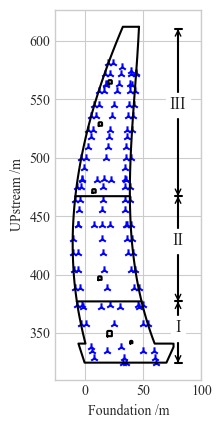

In [5]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.scatter('x', 'y', marker = "2", data = lo_all, c = 'b')
plt.plot("x","y", data = shape16, color = "black")
plt.plot("Col1","Col2", data = lo_16langdao1, c = "k")
plt.plot([77,83],[610,610], color = 'black') # y = 610 the top height of Section III
plt.plot([77,83],[467,467], color = 'black') # y = 467 the top height of Secetion II
plt.plot([77,83],[377,377], color = 'black') # y = 467 the top height of Secetion I
plt.plot([77,83],[324.5,324.5], color = 'black') # y = 467 the bottom height of Secetion I
plt.plot([80,80],[324.5,610], color = 'black')
plt.annotate("",
            xy=(80, 610), xycoords='data',
            xytext=(80, 467), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.annotate("",
            xy=(80, 377), xycoords='data',
            xytext=(80, 467), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.annotate("",
            xy=(80, 377), xycoords='data',
            xytext=(80, 324.5), textcoords='data',
            arrowprops=dict(arrowstyle="<->", shrinkA =0, shrinkB=0, color='k',lw =1),
            )
plt.text(80,538, "III",fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.text(80,422, "II", fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.text(80,347, "I",  fontsize=12, bbox={'facecolor': 'white','pad': 3, 'edgecolor' : "white"},ha='center', va = 'bottom')
plt.xlabel('Foundation /m')
plt.ylabel('UPstream /m')
plt.axis('scaled')
plt.xlim(-25,100)
plt.savefig('FusionModel_Fig2.png', dpi=300)

### Fig3

In [6]:
Fig3 = pyreadr.read_r('Fig3.Rdata')
Fig3.keys() # Check the names of all DataFrame imported from Rdata.

odict_keys(['ptsl_idw_df_inout_shape16', 'lo_opt_bound', 'lo_y0_opt', 'lo_corridor16'])

In [7]:
ptsl_idw_df_inout_shape16 = Fig3["ptsl_idw_df_inout_shape16"]
ptsl_idw_df_inout_shape16 = ptsl_idw_df_inout_shape16.rename({'var1.pred': 'Temperature'}, axis=1) 
# Coordinates of dam inner temperatures on the initial date, wich is 2014-07-01 used in the paper.
lo_opt_bound = Fig3["lo_opt_bound"]
# Location of thermometers served as the boundary condition of the Camp Chian inversion algorithm.
lo_y0_opt = Fig3["lo_y0_opt"]
# Location of thermometers served as verifications of the Camp Chian inversion algorithm.
lo_corridor16 = Fig3["lo_corridor16"]
# Rough locations of dam galleries for labeling purpose.

In [8]:
!pip install plotly

In [9]:
!pip install kaleido
import kaleido

In [10]:
import plotly.graph_objs as go

In [11]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [38]:
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [39]:
fig.show(renderer="svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [12]:
fig = go.Figure(
    go.Heatmap(
        x=ptsl_idw_df_inout_shape16['x'], 
        y=ptsl_idw_df_inout_shape16['y'], 
        z=ptsl_idw_df_inout_shape16['Temperature'], 
        colorscale='speed',
        colorbar=dict(title='Initial <br>heatmap °C')
    )
) # Generate the heatmap of dam concrete on the initial calculation day.

fig.add_trace(
    go.Scatter(
        x=shape16["x"],
        y=shape16["y"],
        line=dict(color="black"),
        showlegend=False
    )
) # Add the dam boundary in black color.

fig.add_trace(
    go.Scatter(
        x=lo_16langdao1["Col1"],
        y=lo_16langdao1["Col2"],
        line=dict(color="black"),
        showlegend=False
    )
) # Add the dam garlleries in black color.

fig.add_trace(
    go.Scatter(
    x=lo_corridor16["x"],
    y=lo_corridor16["y"]+8,
    mode="text",
    text=lo_corridor16["index"],
    textfont=dict(
        size=11,
        color="black"
    ),
    #textfont_size=11,
    showlegend=False
    )
) # Mark names of the galleries.

# create annotations iteratively for each thermometer
for i, val in enumerate(lo_y0_opt["x"]): 
    fig.add_annotation(
        x = lo_y0_opt["x"][i], 
        y = lo_y0_opt["y"][i], 
        text = lo_y0_opt["index"][i],
        showarrow=False,
        textangle=-30,
        xshift=15,
        yshift=10,
        font=dict(color='darkorchid', size=10))
# Indices of verification thermometers. Use add_annotation to chang text angles. Unfortunately, I haven't find an easy 
# way to generate text in batches. So a for loop has been used.

fig.add_trace(
    go.Scatter(
        x=lo_opt_bound["x"],
        y=lo_opt_bound["y"],
        mode="markers",
        marker_symbol="circle-cross-open",
        marker=dict(color="blue"),
        showlegend=False
    )
) # Add the boundary conditions of the inverse problem.

fig.add_trace(
    go.Scatter(
        x=lo_y0_opt["x"],
        y=lo_y0_opt["y"],
        mode="markers",
        marker=dict(color="darkorchid"),
        showlegend=False
    )
) # Add the verifications of the inverse problem.

fig.update_xaxes(
        title_text = "Foundation /m",
        title_font = {"size": 15},
        title_standoff = 20)

fig.update_yaxes(
        title_text = "Upstream",
        title_font = {"size": 15},
        title_standoff = 20)

fig.update_layout(width=500,height=700,template = "plotly_white",
                 yaxis = dict(scaleanchor = "x", scaleratio = 1),
                 font = dict(family="Times new roman")) # Set up a nice theme suitable for publication.
# 'scaleanchor' and 'scaleratio' are used to force a fixed ratio of pixels per unit between two axes.